280464.20508762385 361237.00287336553


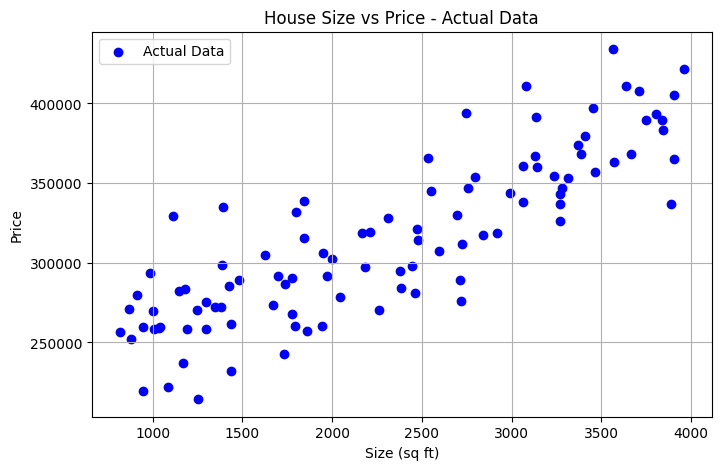

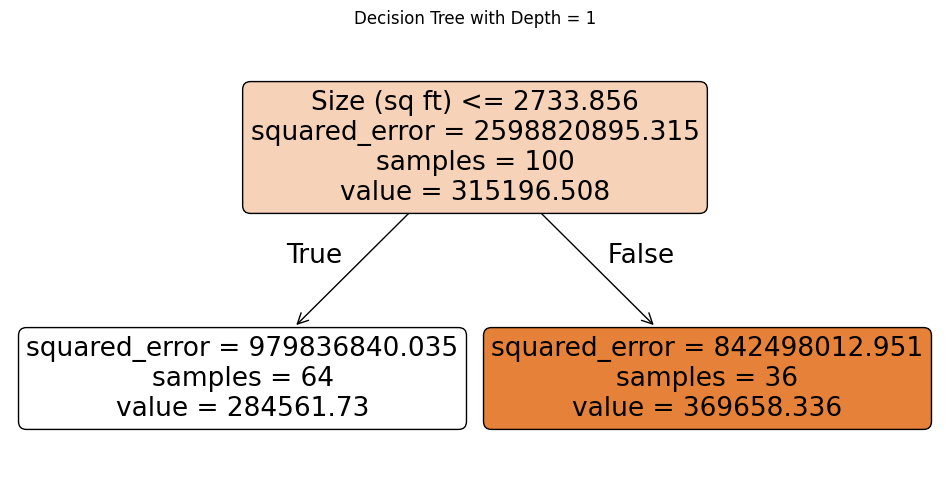

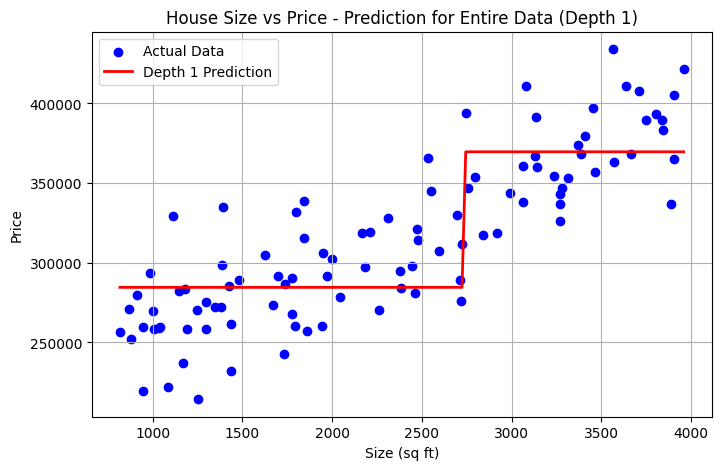

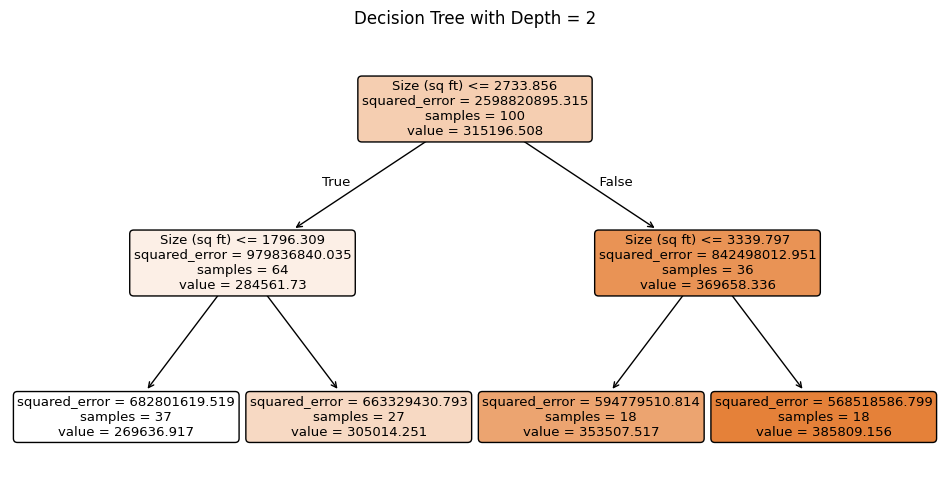

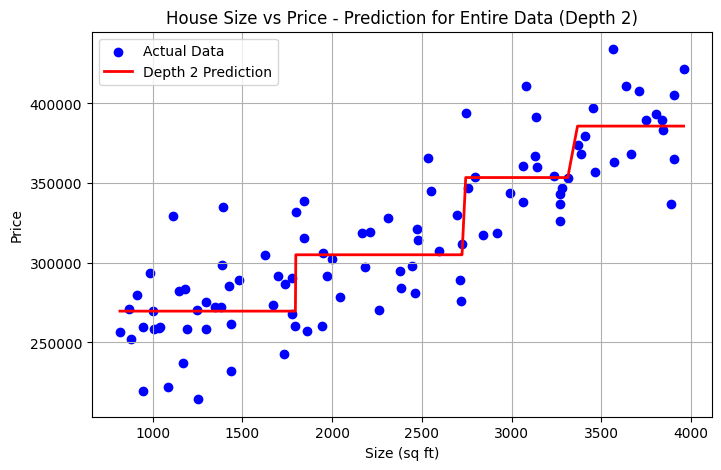

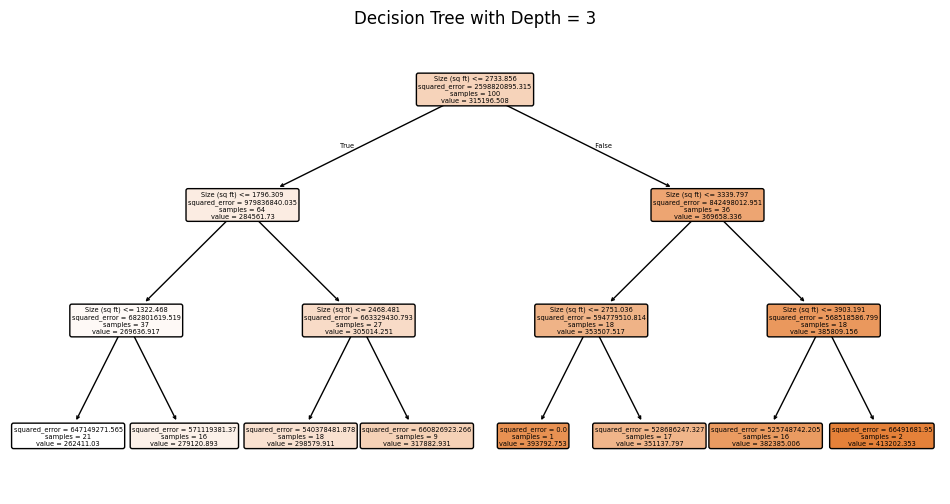

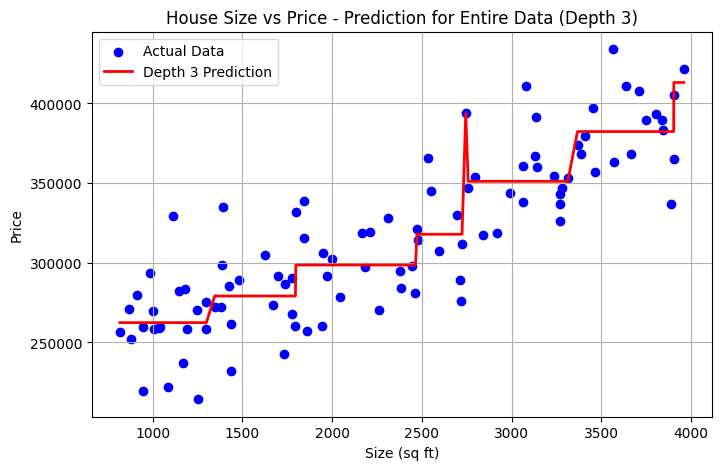

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree

# 🏡 Story: Predicting house prices based on size (x1)
np.random.seed(42)
n = 100  # 100 data points

x1 = np.random.uniform(800, 4000, n)  # House size in sq. ft.
price = 200000 + 50 * x1 + np.random.normal(0, 30000, n)  # Target variable: House price

# Create DataFrame
df = pd.DataFrame({'Size (sq ft)': x1, 'Price': price})

# Sort the data by Size (x1)
df_sorted = df.sort_values('Size (sq ft)')

# a simple try
threshold = 2500
low_mean = df_sorted[df_sorted['Size (sq ft)'] <= threshold]['Price'].mean()
high_mean = df_sorted[df_sorted['Size (sq ft)'] > threshold]['Price'].mean()
print(low_mean, high_mean)

# Extract features and target
X = df_sorted[['Size (sq ft)']]
y = df_sorted['Price']

# 2. Show Size vs Price chart for the entire dataset
plt.figure(figsize=(8, 5))
plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')
plt.title('House Size vs Price - Actual Data')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. Function to train and plot trees with different depths
def plot_tree_with_depth(depth):
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_model.fit(X, y)

    # Plot tree
    plt.figure(figsize=(12, 6))
    plot_tree(tree_model, feature_names=['Size (sq ft)'], filled=True, rounded=True)
    plt.title(f"Decision Tree with Depth = {depth}")
    plt.show()

    return tree_model

# 4. Plot Trees with different depths: 1, 2, 3
for depth in [1, 2, 3]:
    model = plot_tree_with_depth(depth)

    # Predict price for the entire dataset using the tree model
    y_pred = model.predict(X)

    # Show prediction on the Size vs Price chart for the entire dataset
    plt.figure(figsize=(8, 5))
    plt.scatter(X['Size (sq ft)'], y, color='blue', label='Actual Data')
    plt.plot(X['Size (sq ft)'], y_pred, label=f'Depth {depth} Prediction', color='red', linewidth=2)
    plt.title(f'House Size vs Price - Prediction for Entire Data (Depth {depth})')
    plt.xlabel('Size (sq ft)')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [15]:
X_test, 

(    Size (sq ft)
 72    817.670775
 58    944.727325
 68   1038.562060
 37   1112.550765
 66   1250.957520
 14   1381.839895
 61   1668.316902
 64   1698.990431
 22   1734.862875
 59   1841.057058
 0    1998.528380
 60   2043.767327
 27   2445.550203
 74   3061.943500
 75   3132.822938
 92   3234.512156
 94   3267.094976
 51   3280.425035
 35   3386.871514
 53   3663.447521,
 35    538687.151397
 27    444555.020292
 74    506194.350031
 60    404376.732701
 0     399852.838031
 59    384105.705844
 14    338183.989506
 51    528042.503476
 68    303856.205978
 72    281767.077480
 66    325095.751992
 61    366831.690168
 75    513282.293773
 22    373486.287531
 53    566344.752137
 58    294472.732451
 92    523451.215557
 94    526709.497585
 37    311255.076482
 64    369899.043100
 Name: Price, dtype: float64)

In [16]:
y_test

35    538687.151397
27    444555.020292
74    506194.350031
60    404376.732701
0     399852.838031
59    384105.705844
14    338183.989506
51    528042.503476
68    303856.205978
72    281767.077480
66    325095.751992
61    366831.690168
75    513282.293773
22    373486.287531
53    566344.752137
58    294472.732451
92    523451.215557
94    526709.497585
37    311255.076482
64    369899.043100
Name: Price, dtype: float64